# Denoising handwritten digits using autoencoders

- This is a spinoff from the handwritten digit recognition project. Artificial noise (gaussian) is added to images and the autoencoder will attempt to reconstruct the original image.

Source of code : https://github.com/iitkliv/dlvcnptel/blob/master/lecture12.ipynb

---

## Importing libraries and dataset

In [1]:

%matplotlib inline
import os
import copy
import torch
import codecs
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets
from torchvision import transforms
from tqdm import tqdm

print(torch.__version__)

1.5.0


## Defining basic functions needed

In [13]:
# Converting images to tensors
transform = transforms.Compose([transforms.ToTensor()])
batchsize = 10000

# Loading training and test sets
TrainSet    = datasets.MNIST(root="../downloads/MNIST", train=True, download=True, transform=transform)
TrainLoader = torch.utils.data.DataLoader(TrainSet, batch_size=batchsize, shuffle=True, num_workers=1)
TestSet     = datasets.MNIST(root="../downloads/MNIST", train=False, download=True, transform=transform)
TestLoader  = torch.utils.data.DataLoader(TrainSet, batch_size=batchsize, shuffle=True, num_workers=1)

classes    = ('zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine')

In [14]:
use_gpu = torch.cuda.is_available()
if use_gpu:
    print("GPU is available!")
    device = "cuda"
else:
    print("GPU is not available")
    device = "cpu"

GPU is available!


In [15]:
def add_noise(image, std_dev, dev=device):
    noise = torch.abs(std_dev * torch.randn(*image.shape).to(dev))
    return image + noise

In [16]:
def model_init(m):
    if(isinstance(m, nn.Linear)):
        nn.init.xavier_uniform_(m.weight)
        nn.init.zeros_(m.bias)

## Defining the autoencoder

In [17]:
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(nn.Linear(28*28, 200), nn.ReLU(), nn.Linear(200,100), nn.ReLU())
        self.decoder = nn.Sequential(nn.Linear(100,200), nn.ReLU(), nn.Linear(200, 28*28), nn.ReLU())

    def forward(self, x):
        x = x.view(-1,28*28)
        
        x = self.encoder(x)
        x = self.decoder(x)

        x = x.view(-1,1,28,28)
        return x
    
net = autoencoder()
print(net)

net = net.double().to(device)

init_weights = copy.deepcopy(net.encoder[0].weight.data)

autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=200, bias=True)
    (1): ReLU()
    (2): Linear(in_features=200, out_features=100, bias=True)
    (3): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=100, out_features=200, bias=True)
    (1): ReLU()
    (2): Linear(in_features=200, out_features=784, bias=True)
    (3): ReLU()
  )
)


## Defining optimizer

In [18]:
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=1.5, momentum=0.5)

## Training the autoencoder

In [26]:
net.apply(model_init)
first = True

  0%|          | 0/120 [00:00<?, ?it/s]

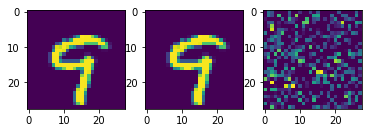

Loss : 0.106
  1%|          | 1/120 [00:03<07:40,  3.87s/it]

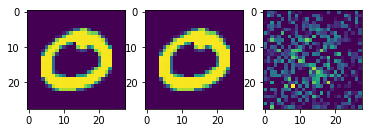

Loss : 0.049
  2%|▏         | 2/120 [00:07<07:37,  3.88s/it]

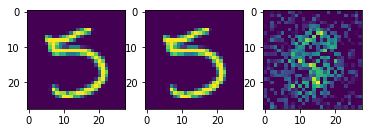

Loss : 0.028
  2%|▎         | 3/120 [00:11<07:31,  3.86s/it]

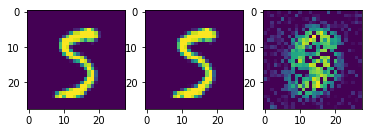

Loss : 0.019
  3%|▎         | 4/120 [00:15<07:26,  3.85s/it]

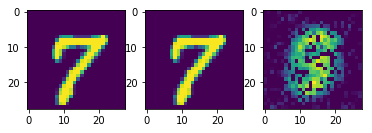

Loss : 0.015
  4%|▍         | 5/120 [00:19<07:17,  3.81s/it]

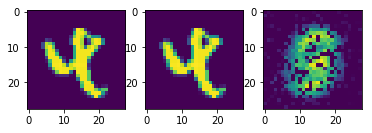

Loss : 0.012
  5%|▌         | 6/120 [00:23<07:17,  3.84s/it]

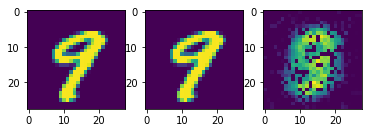

Loss : 0.010
  6%|▌         | 7/120 [00:26<07:14,  3.85s/it]

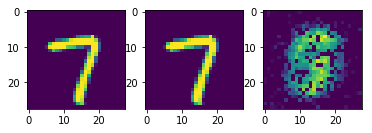

Loss : 0.009
  7%|▋         | 8/120 [00:30<07:13,  3.87s/it]

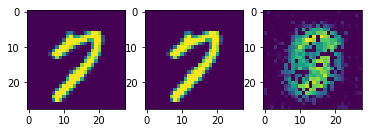

Loss : 0.008
  8%|▊         | 9/120 [00:34<07:10,  3.88s/it]

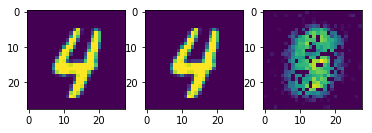

Loss : 0.007
  8%|▊         | 10/120 [00:38<07:10,  3.91s/it] Iteration :  10/120; loss : 0.043


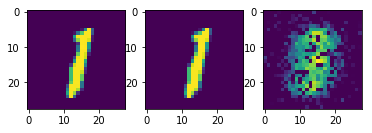

Loss : 0.006
  9%|▉         | 11/120 [00:42<07:02,  3.88s/it]

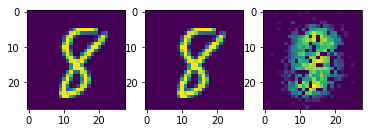

Loss : 0.006
 10%|█         | 12/120 [00:46<06:59,  3.88s/it]

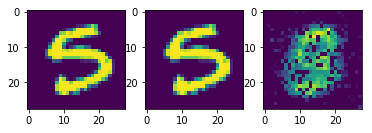

Loss : 0.005
 11%|█         | 13/120 [00:50<06:54,  3.88s/it]

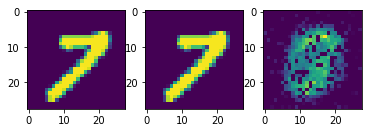

Loss : 0.005
 12%|█▏        | 14/120 [00:54<06:47,  3.85s/it]

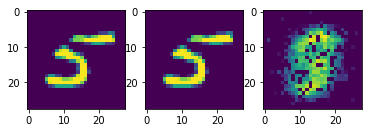

Loss : 0.005
 12%|█▎        | 15/120 [00:57<06:45,  3.87s/it]

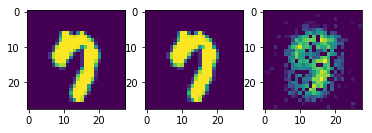

Loss : 0.004
 13%|█▎        | 16/120 [01:01<06:39,  3.84s/it]

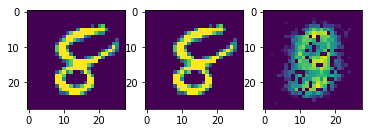

Loss : 0.004
 14%|█▍        | 17/120 [01:05<06:35,  3.84s/it]

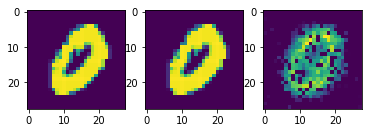

Loss : 0.004
 15%|█▌        | 18/120 [01:09<06:33,  3.85s/it]

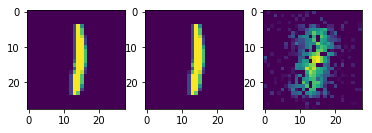

Loss : 0.003
 16%|█▌        | 19/120 [01:13<06:27,  3.84s/it]

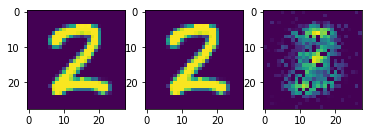

Loss : 0.003
 17%|█▋        | 20/120 [01:17<06:23,  3.83s/it] Iteration :  20/120; loss : 0.018


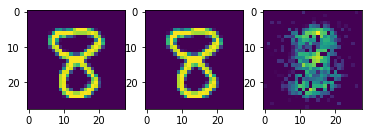

Loss : 0.003
 18%|█▊        | 21/120 [01:20<06:21,  3.86s/it]

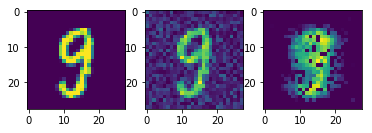

Loss : 0.003
 18%|█▊        | 22/120 [01:24<06:19,  3.87s/it]

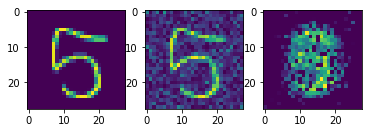

Loss : 0.003
 19%|█▉        | 23/120 [01:28<06:16,  3.88s/it]

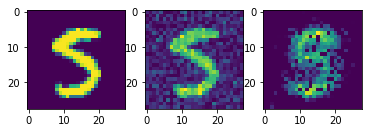

Loss : 0.002
 20%|██        | 24/120 [01:32<06:20,  3.97s/it]

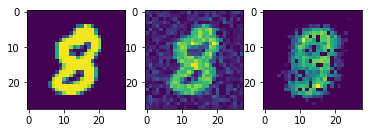

Loss : 0.002
 21%|██        | 25/120 [01:36<06:17,  3.97s/it]

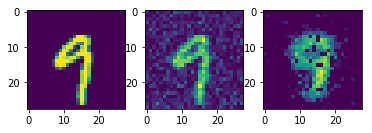

Loss : 0.002
 22%|██▏       | 26/120 [01:41<06:19,  4.04s/it]

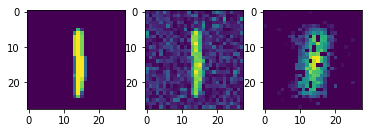

Loss : 0.002
 22%|██▎       | 27/120 [01:45<06:18,  4.07s/it]

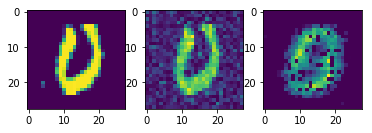

Loss : 0.002
 23%|██▎       | 28/120 [01:49<06:18,  4.11s/it]

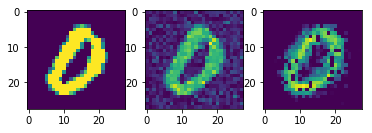

Loss : 0.002
 24%|██▍       | 29/120 [01:53<06:16,  4.14s/it]

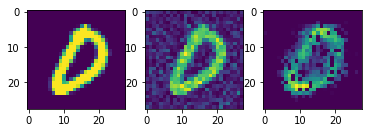

Loss : 0.002
 25%|██▌       | 30/120 [01:57<06:12,  4.14s/it] Iteration :  30/120; loss : 0.011


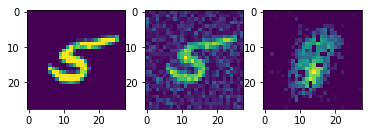

Loss : 0.002
 26%|██▌       | 31/120 [02:02<06:10,  4.16s/it]

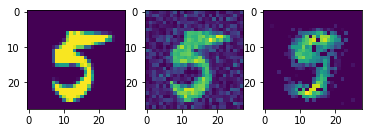

Loss : 0.002
 27%|██▋       | 32/120 [02:06<06:09,  4.20s/it]

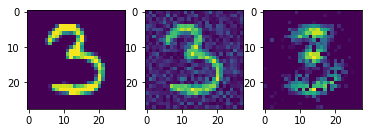

Loss : 0.002
 28%|██▊       | 33/120 [02:10<06:03,  4.18s/it]

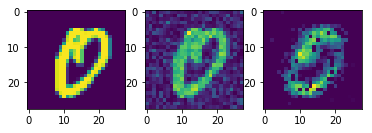

Loss : 0.001
 28%|██▊       | 34/120 [02:14<05:54,  4.12s/it]

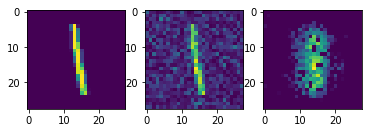

Loss : 0.001
 29%|██▉       | 35/120 [02:18<05:49,  4.11s/it]

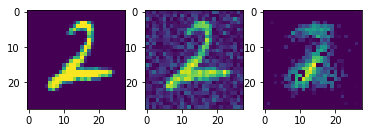

Loss : 0.001
 30%|███       | 36/120 [02:22<05:47,  4.14s/it]

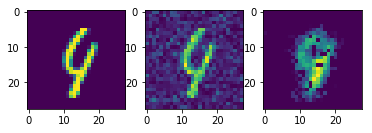

Loss : 0.001
 31%|███       | 37/120 [02:26<05:41,  4.12s/it]

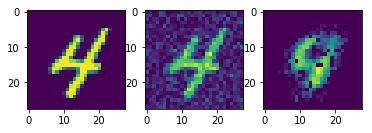

Loss : 0.001
 32%|███▏      | 38/120 [02:30<05:38,  4.13s/it]

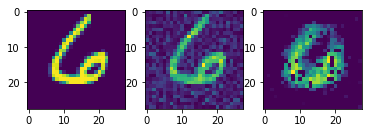

Loss : 0.001
 32%|███▎      | 39/120 [02:35<05:36,  4.16s/it]

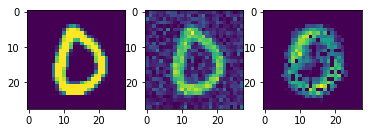

Loss : 0.001
 33%|███▎      | 40/120 [02:39<05:34,  4.18s/it] Iteration :  40/120; loss : 0.007


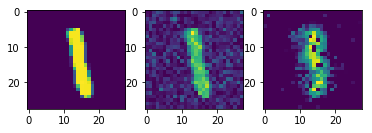

Loss : 0.001
 34%|███▍      | 41/120 [02:43<05:30,  4.19s/it]

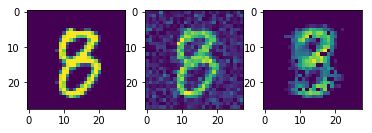

Loss : 0.001
 35%|███▌      | 42/120 [02:47<05:29,  4.23s/it]

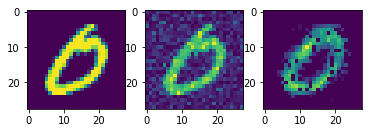

Loss : 0.001
 36%|███▌      | 43/120 [02:52<05:25,  4.22s/it]

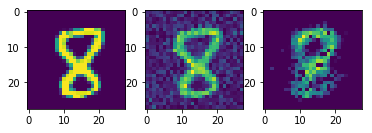

Loss : 0.001
 37%|███▋      | 44/120 [02:56<05:19,  4.20s/it]

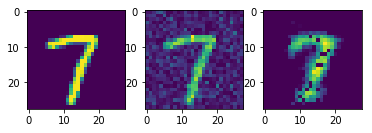

Loss : 0.001
 38%|███▊      | 45/120 [03:00<05:12,  4.17s/it]

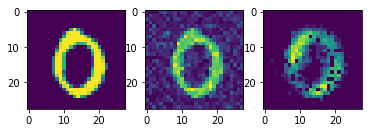

Loss : 0.001
 38%|███▊      | 46/120 [03:04<05:08,  4.17s/it]

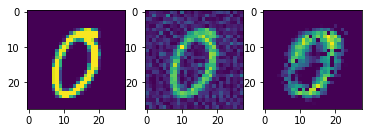

Loss : 0.001
 39%|███▉      | 47/120 [03:08<05:02,  4.15s/it]

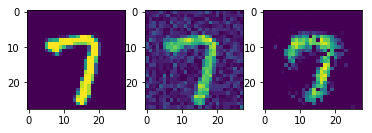

Loss : 0.001
 40%|████      | 48/120 [03:12<04:57,  4.13s/it]

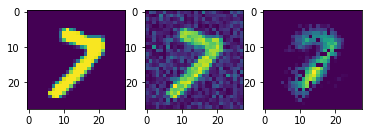

Loss : 0.001
 41%|████      | 49/120 [03:16<04:53,  4.13s/it]

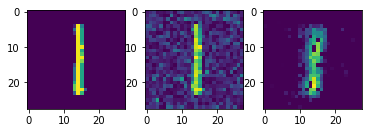

Loss : 0.001
 42%|████▏     | 50/120 [03:21<04:50,  4.15s/it] Iteration :  50/120; loss : 0.005


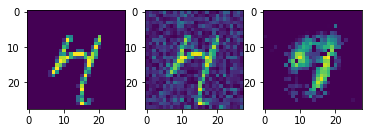

Loss : 0.001
 42%|████▎     | 51/120 [03:25<04:47,  4.16s/it]

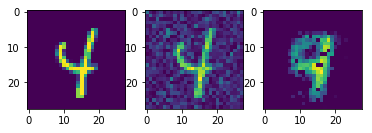

Loss : 0.001
 43%|████▎     | 52/120 [03:29<04:43,  4.17s/it]

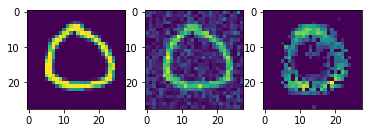

Loss : 0.001
 44%|████▍     | 53/120 [03:33<04:40,  4.18s/it]

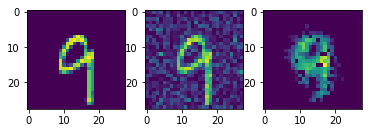

Loss : 0.001
 45%|████▌     | 54/120 [03:37<04:33,  4.14s/it]

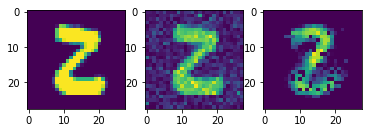

Loss : 0.001
 46%|████▌     | 55/120 [03:41<04:27,  4.11s/it]

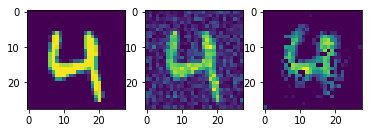

Loss : 0.001
 47%|████▋     | 56/120 [03:45<04:24,  4.13s/it]

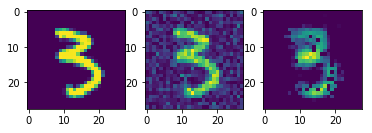

Loss : 0.001
 48%|████▊     | 57/120 [03:50<04:21,  4.16s/it]

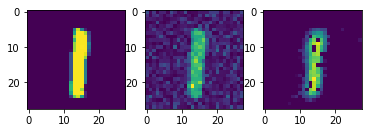

Loss : 0.001
 48%|████▊     | 58/120 [03:54<04:18,  4.17s/it]

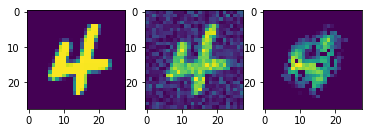

Loss : 0.001
 49%|████▉     | 59/120 [03:58<04:11,  4.12s/it]

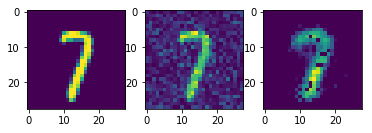

Loss : 0.001
 50%|█████     | 60/120 [04:02<04:08,  4.14s/it] Iteration :  60/120; loss : 0.004


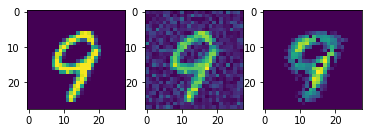

Loss : 0.001
 51%|█████     | 61/120 [04:06<04:04,  4.15s/it]

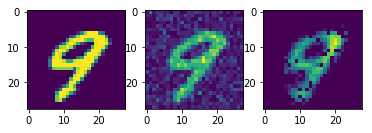

Loss : 0.001
 52%|█████▏    | 62/120 [04:10<04:02,  4.18s/it]

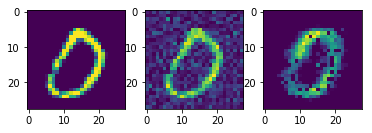

Loss : 0.001
 52%|█████▎    | 63/120 [04:15<03:57,  4.17s/it]

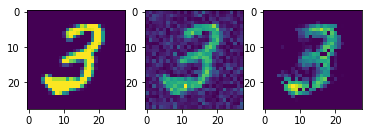

Loss : 0.001
 53%|█████▎    | 64/120 [04:19<03:52,  4.15s/it]

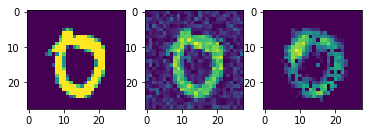

Loss : 0.001
 54%|█████▍    | 65/120 [04:23<03:48,  4.15s/it]

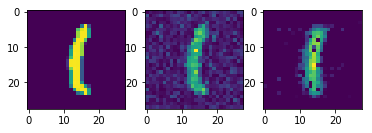

Loss : 0.001
 55%|█████▌    | 66/120 [04:27<03:44,  4.15s/it]

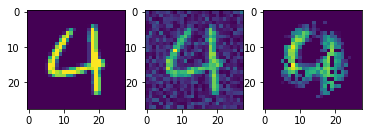

Loss : 0.001
 56%|█████▌    | 67/120 [04:31<03:41,  4.18s/it]

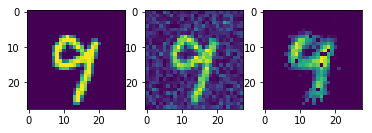

Loss : 0.001
 57%|█████▋    | 68/120 [04:35<03:35,  4.14s/it]

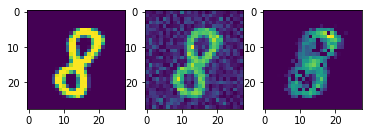

Loss : 0.001
 57%|█████▊    | 69/120 [04:39<03:29,  4.11s/it]

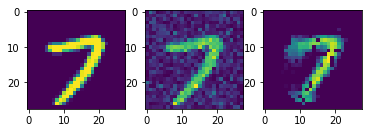

Loss : 0.001
 58%|█████▊    | 70/120 [04:43<03:25,  4.11s/it] Iteration :  70/120; loss : 0.003


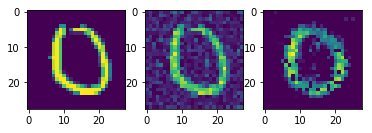

Loss : 0.001
 59%|█████▉    | 71/120 [04:48<03:22,  4.13s/it]

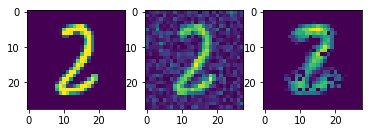

Loss : 0.001
 60%|██████    | 72/120 [04:52<03:19,  4.15s/it]

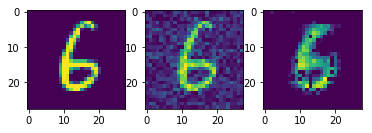

Loss : 0.001
 61%|██████    | 73/120 [04:56<03:13,  4.11s/it]

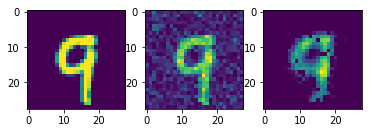

Loss : 0.001
 62%|██████▏   | 74/120 [05:00<03:09,  4.12s/it]

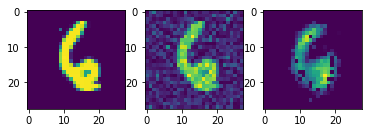

Loss : 0.000
 62%|██████▎   | 75/120 [05:04<03:04,  4.10s/it]

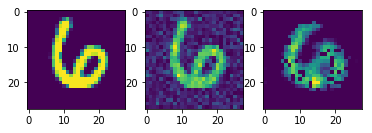

Loss : 0.000
 63%|██████▎   | 76/120 [05:08<02:59,  4.09s/it]

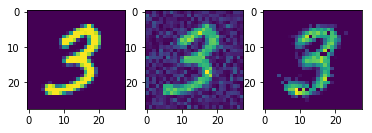

Loss : 0.000
 64%|██████▍   | 77/120 [05:12<02:56,  4.10s/it]

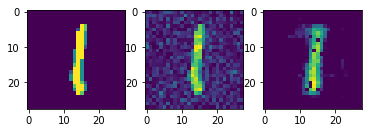

Loss : 0.000
 65%|██████▌   | 78/120 [05:16<02:53,  4.13s/it]

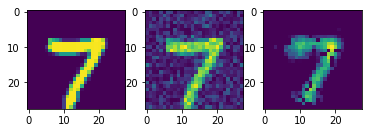

Loss : 0.000
 66%|██████▌   | 79/120 [05:21<02:50,  4.16s/it]

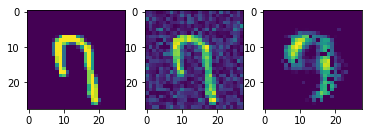

Loss : 0.000
 67%|██████▋   | 80/120 [05:25<02:46,  4.16s/it] Iteration :  80/120; loss : 0.003


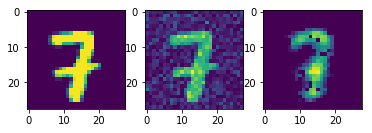

Loss : 0.000
 68%|██████▊   | 81/120 [05:29<02:41,  4.15s/it]

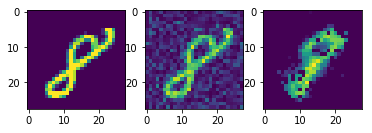

Loss : 0.000
 68%|██████▊   | 82/120 [05:33<02:37,  4.15s/it]

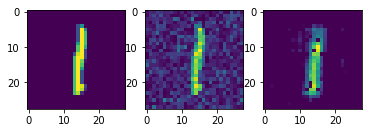

Loss : 0.000
 69%|██████▉   | 83/120 [05:37<02:33,  4.16s/it]

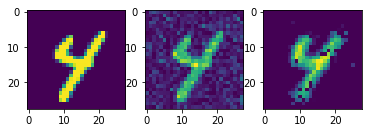

Loss : 0.000
 70%|███████   | 84/120 [05:42<02:30,  4.18s/it]

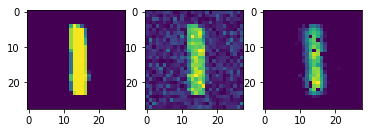

Loss : 0.000
 71%|███████   | 85/120 [05:46<02:25,  4.17s/it]

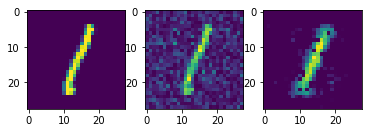

Loss : 0.000
 72%|███████▏  | 86/120 [05:50<02:20,  4.13s/it]

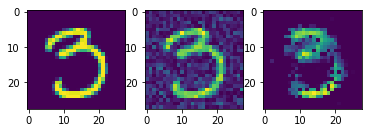

Loss : 0.000
 72%|███████▎  | 87/120 [05:54<02:17,  4.17s/it]

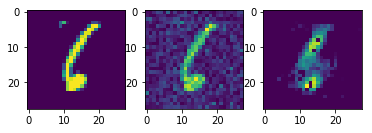

Loss : 0.000
 73%|███████▎  | 88/120 [05:58<02:13,  4.18s/it]

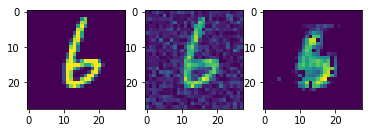

Loss : 0.000
 74%|███████▍  | 89/120 [06:02<02:09,  4.16s/it]

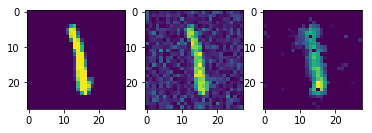

Loss : 0.000
 75%|███████▌  | 90/120 [06:06<02:05,  4.17s/it] Iteration :  90/120; loss : 0.002


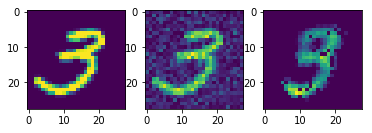

Loss : 0.000
 76%|███████▌  | 91/120 [06:11<02:01,  4.18s/it]

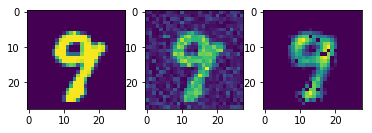

Loss : 0.000
 77%|███████▋  | 92/120 [06:15<01:57,  4.18s/it]

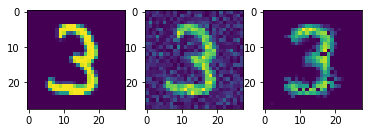

Loss : 0.000
 78%|███████▊  | 93/120 [06:19<01:52,  4.16s/it]

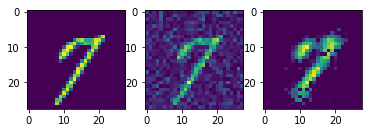

Loss : 0.000
 78%|███████▊  | 94/120 [06:23<01:48,  4.19s/it]

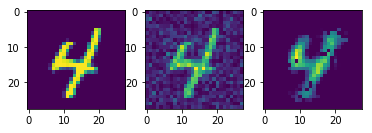

Loss : 0.000
 79%|███████▉  | 95/120 [06:27<01:43,  4.15s/it]

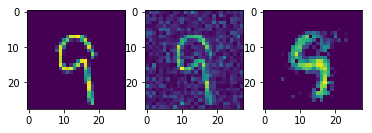

Loss : 0.000
 80%|████████  | 96/120 [06:31<01:39,  4.14s/it]

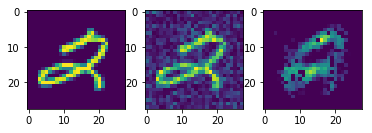

Loss : 0.000
 81%|████████  | 97/120 [06:36<01:34,  4.12s/it]

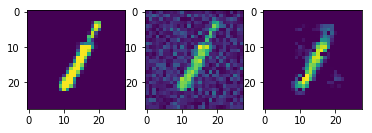

Loss : 0.000
 82%|████████▏ | 98/120 [06:40<01:31,  4.15s/it]

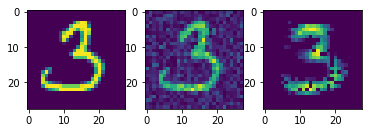

Loss : 0.000
 82%|████████▎ | 99/120 [06:44<01:26,  4.14s/it]

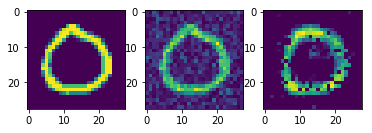

Loss : 0.000
 83%|████████▎ | 100/120 [06:48<01:22,  4.14s/it] Iteration : 100/120; loss : 0.002


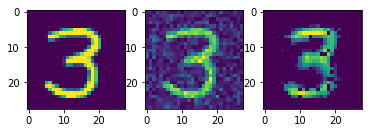

Loss : 0.000
 84%|████████▍ | 101/120 [06:52<01:19,  4.16s/it]

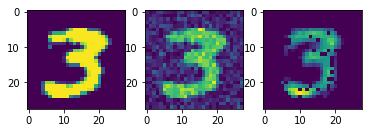

Loss : 0.000
 85%|████████▌ | 102/120 [06:56<01:15,  4.19s/it]

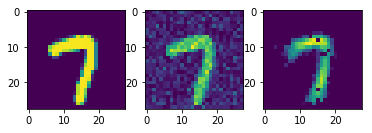

Loss : 0.000
 86%|████████▌ | 103/120 [07:01<01:11,  4.21s/it]

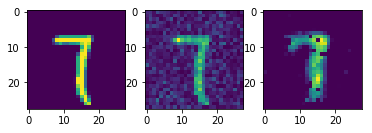

Loss : 0.000
 87%|████████▋ | 104/120 [07:05<01:07,  4.22s/it]

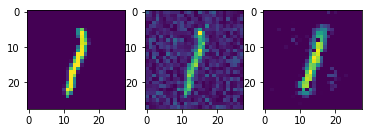

Loss : 0.000
 88%|████████▊ | 105/120 [07:09<01:03,  4.23s/it]

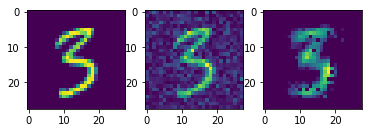

Loss : 0.000
 88%|████████▊ | 106/120 [07:13<00:58,  4.18s/it]

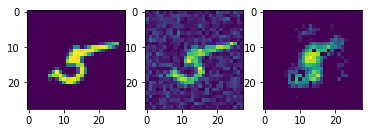

Loss : 0.000
 89%|████████▉ | 107/120 [07:18<00:54,  4.20s/it]

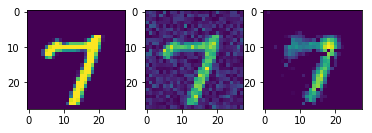

Loss : 0.000
 90%|█████████ | 108/120 [07:22<00:51,  4.26s/it]

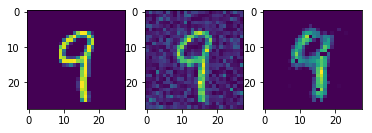

Loss : 0.000
 91%|█████████ | 109/120 [07:26<00:46,  4.27s/it]

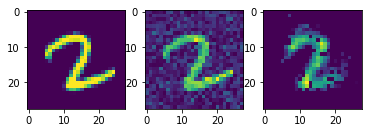

Loss : 0.000
 92%|█████████▏| 110/120 [07:30<00:42,  4.23s/it] Iteration : 110/120; loss : 0.002


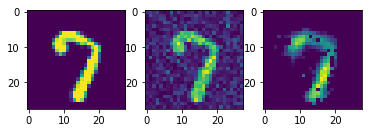

Loss : 0.000
 92%|█████████▎| 111/120 [07:35<00:38,  4.25s/it]

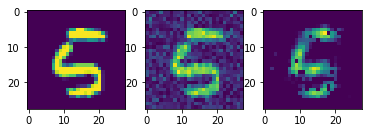

Loss : 0.000
 93%|█████████▎| 112/120 [07:39<00:33,  4.23s/it]

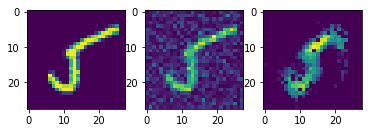

Loss : 0.000
 94%|█████████▍| 113/120 [07:43<00:29,  4.24s/it]

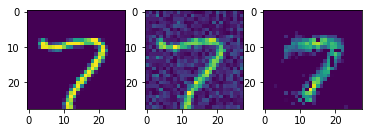

Loss : 0.000
 95%|█████████▌| 114/120 [07:47<00:25,  4.24s/it]

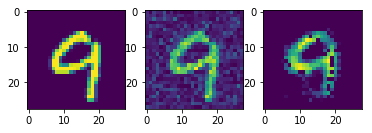

Loss : 0.000
 96%|█████████▌| 115/120 [07:52<00:21,  4.27s/it]

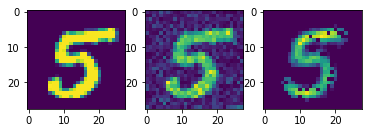

Loss : 0.000
 97%|█████████▋| 116/120 [07:56<00:17,  4.31s/it]

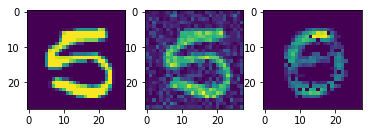

Loss : 0.000
 98%|█████████▊| 117/120 [08:00<00:12,  4.30s/it]

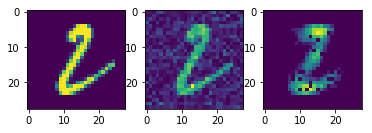

Loss : 0.000
 98%|█████████▊| 118/120 [08:05<00:08,  4.30s/it]

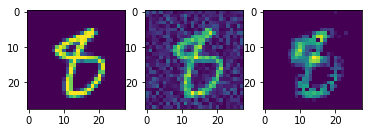

Loss : 0.000
 99%|█████████▉| 119/120 [08:09<00:04,  4.30s/it]

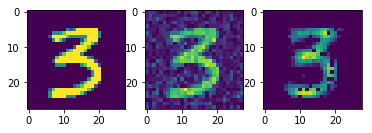

Loss : 0.000
100%|██████████| 120/120 [08:13<00:00,  4.11s/it] Iteration : 120/120; loss : 0.002
Finished training



In [27]:
iterations = 120
noise = 50

# Set this to true to view the input, noised input, and output of the autoencoder for each epoch
debug = False

for epoch in tqdm(range(iterations)):
    runningLoss = 0
    for i, data in enumerate(TrainLoader):
        inputs, labels = data
        inputs = inputs.double().view(-1,1,28,28)
        inputs = inputs.to(device)

        # Doesnt apply noise for first 20 epochs
        if(first):
            noised = inputs
        else:
            noised = add_noise(inputs, noise/255)

        optimizer.zero_grad()
        outputs = net(noised)

        loss = criterion(outputs, inputs)
        # print(loss)
        # print(outputs.shape, inputs.shape)
        loss.backward()
        optimizer.step()
        runningLoss += loss.item()

        if(debug and i==0):
            plt.subplot(131)
            plt.imshow(inputs[0].view(28,28).cpu())
            plt.subplot(132)
            plt.imshow(noised[0].view(28,28).cpu())
            plt.subplot(133)
            plt.imshow(outputs[0].view(28,28).cpu().detach())
            plt.show()
            print("Loss : %2.3f"%(runningLoss/(epoch+1)))
    
    if(epoch%10==9):
        print(" Iteration : %3d/%3d; loss : %2.3f"%(epoch+1, iterations, runningLoss/(epoch+1)))
    
    if(epoch == 20):
        first = False

print("Finished training")

## Visualising result


Test set index number : 336


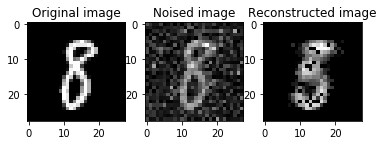


Test set index number : 5316


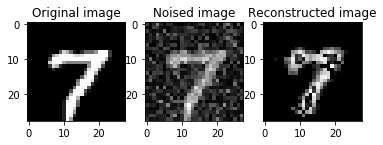


Test set index number : 9347


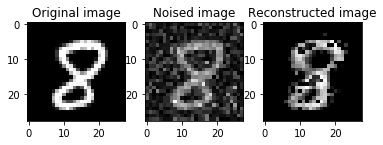


Test set index number : 9865


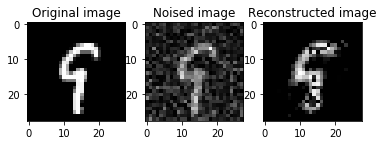


Test set index number : 6763


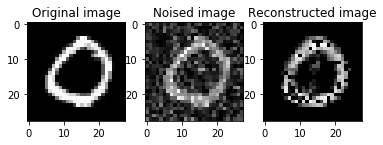


Test set index number : 7800


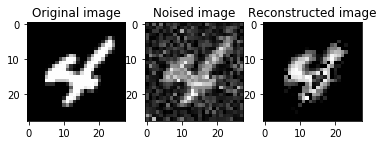


Test set index number : 3081


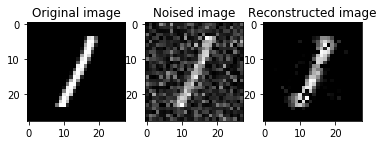


Test set index number : 8205


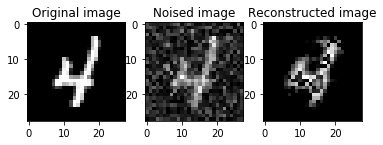


Test set index number : 4411


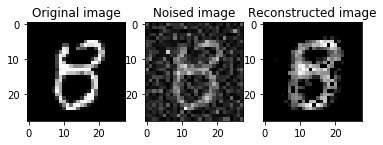


Test set index number : 1097


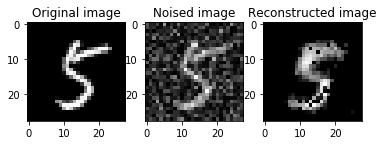

In [37]:
TestImages, _ = list(TrainLoader)[0]
indices = np.random.uniform(0, TestImages.shape[0], size=10)

for i in indices:
    print()
    print("Test set index number : %d"%i)

    test_img = TestImages[int(i)]*255

    test_noise = 100
    noised_img = add_noise(test_img, test_noise, "cpu")

    out = net((noised_img.double().to(device))/255)
    output_img = (out.data*255).byte()
    output_img = output_img.view(-1, 28, 28)

    if device == "cuda":
        output_img = output_img.cpu()
        noised_img = noised_img.cpu()

    test_img = test_img.view(-1, 28, 28)
    noised_img = noised_img.view(-1, 28, 28)

    plt.subplot(1,3,1)
    img = np.array(test_img.numpy())[0]
    plt.title("Original image")
    plt.imshow(img, cmap="gray")

    plt.subplot(1,3,2)
    img = np.array(noised_img.numpy())[0]
    plt.title("Noised image")
    plt.imshow(img, cmap="gray")

    plt.subplot(1,3,3)
    out_img = np.array(output_img.numpy())[0]
    plt.title("Reconstructed image")
    plt.imshow(out_img, cmap="gray")

    plt.show()

## Encoder weights visualisation

In [38]:
trained_weights = copy.deepcopy(net.encoder[0].weight.data)

Text(0.5,1,'Updation of weights')

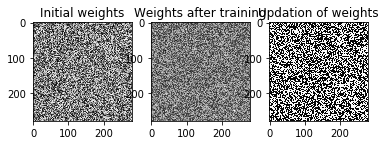

In [39]:
init_weights = (1 + init_weights)*127.5
trained_weights = (1 + trained_weights)*127.5

if use_gpu:
    init_weights = init_weights.view(-1, 280, 280).byte().cpu()
    trained_weights = trained_weights.view(-1, 280, 280).byte().cpu()
else:
    init_weights = init_weights.view(-1,280,280).byte()
    trained_weights = trained_weights.view(-1, 280, 280).byte()

d_weights = init_weights - trained_weights

plt.subplot(131)
plt.imshow(init_weights.numpy()[0], cmap="gray")
plt.title("Initial weights")

plt.subplot(132)
plt.imshow(trained_weights.numpy()[0], cmap="gray")
plt.title("Weights after training")

plt.subplot(133)
plt.imshow(d_weights.numpy()[0], cmap="gray")
plt.title("Updation of weights")